# Training

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.utils import np_utils
from keras import regularizers

## Loading prepared data

In [3]:
train_data = np.load("Data_npy/train_data.npy")
train_label = np.load("Data_npy/train_label.npy")

## Pre-processing Data

In [4]:
# Normalizing data
train_data = train_data / 255.0

In [5]:
# Reshaping data
train_data = train_data.reshape(train_data.shape[0], 100, 100, 3)

In [6]:
num_of_classes = 5
# One-hot encoding of labels
train_label = np_utils.to_categorical(train_label, num_of_classes)

## Building Model

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(1,1),input_shape=(100, 100, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(num_of_classes, activation='softmax'))

## Compiling model

In [8]:
# Loss = categorical_crossentropy
# Optimizer = Adam

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

## Training our CNN model

In [10]:
history = model.fit(train_data, train_label, epochs=20, verbose=2, batch_size=50)

Epoch 1/20
93/93 - 40s - loss: 1.4458 - accuracy: 0.3644 - 40s/epoch - 434ms/step
Epoch 2/20
93/93 - 41s - loss: 1.1386 - accuracy: 0.5518 - 41s/epoch - 443ms/step
Epoch 3/20
93/93 - 42s - loss: 1.0491 - accuracy: 0.5962 - 42s/epoch - 455ms/step
Epoch 4/20
93/93 - 42s - loss: 0.9660 - accuracy: 0.6306 - 42s/epoch - 451ms/step
Epoch 5/20
93/93 - 43s - loss: 0.9096 - accuracy: 0.6514 - 43s/epoch - 457ms/step
Epoch 6/20
93/93 - 43s - loss: 0.8237 - accuracy: 0.6895 - 43s/epoch - 464ms/step
Epoch 7/20
93/93 - 42s - loss: 0.7422 - accuracy: 0.7267 - 42s/epoch - 451ms/step
Epoch 8/20
93/93 - 44s - loss: 0.6294 - accuracy: 0.7676 - 44s/epoch - 478ms/step
Epoch 9/20
93/93 - 45s - loss: 0.5478 - accuracy: 0.7948 - 45s/epoch - 486ms/step
Epoch 10/20
93/93 - 44s - loss: 0.4330 - accuracy: 0.8438 - 44s/epoch - 477ms/step
Epoch 11/20
93/93 - 42s - loss: 0.3376 - accuracy: 0.8862 - 42s/epoch - 453ms/step
Epoch 12/20
93/93 - 43s - loss: 0.2581 - accuracy: 0.9124 - 43s/epoch - 462ms/step
Epoch 13/20
9

## Save the model

In [11]:
model.save("trainedModelE10.h5",overwrite=True)

## Visualizing the result

In [12]:
import matplotlib.pyplot as plt

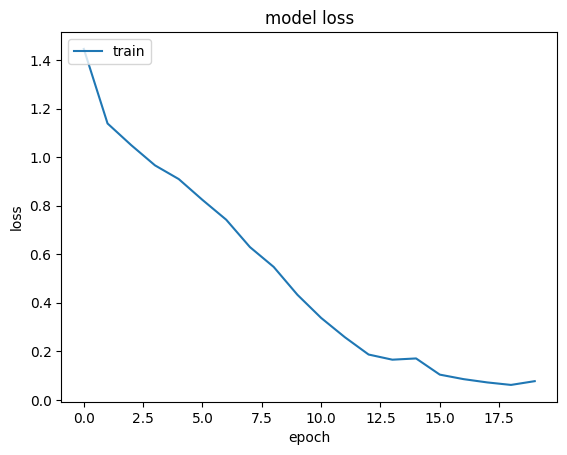

In [13]:
# Loss graph
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Loss')
plt.show()

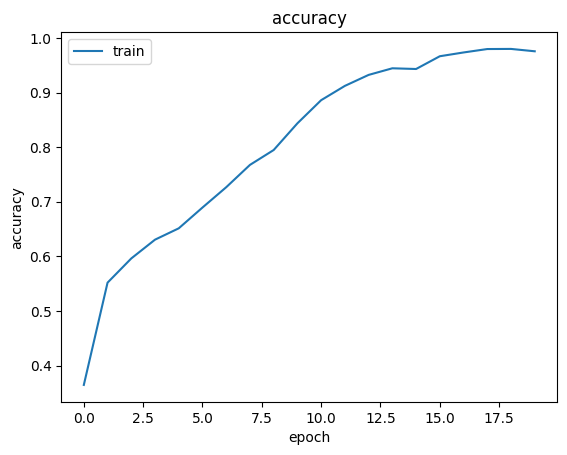

In [14]:
# Accuracy graph
plt.plot(history.history['accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Accuracy')
plt.show()